In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import Data

In [2]:
data = pd.read_csv('dataset/spam.csv',encoding='ISO-8859-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.shape

(5572, 5)

### Drop Columns that are unwanted

In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

#### Change names from v1, v2 to spam and text, since it makes more sense

In [7]:
data.rename(columns={'v1':'spam','v2':'text'},inplace=True)

### Since the column has categorical values, converting them to numerical values

In [8]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
data['spam'] = en.fit_transform(X=data['spam'])

In [9]:
data.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Check for null values

In [10]:
data.isnull().sum()

spam    0
text    0
dtype: int64

In [11]:
data.duplicated().sum()

403

#### Drop Duplicate values

In [12]:
data.drop_duplicates()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
data['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

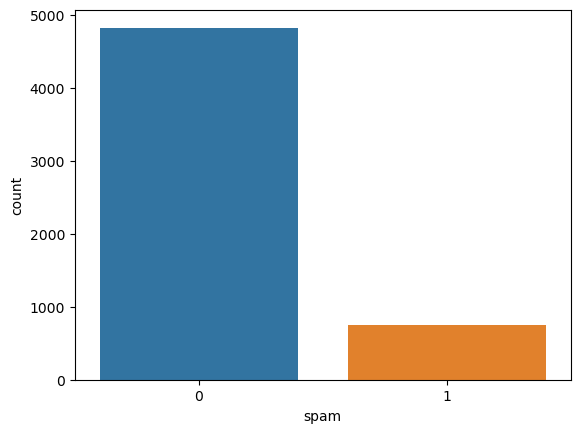

In [14]:
sns.countplot(x ='spam', data = data)

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### 2. EDA

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [18]:
data['no. of chars'] = data['text'].apply(len)

In [19]:
data['no. of words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
data['no. of sentances'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
data.head()

,spam,text,no. of chars,no. of words,no. of sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
data[['no. of sentances','no. of words','no. of chars']].describe()

,no. of sentances,no. of words,no. of chars
count,5572.000000,5572.000000,5572.000000
mean,1.970747,18.695621,80.118808
std,1.417778,13.742587,59.690841
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,61.000000
75%,2.000000,27.000000,121.000000
max,28.000000,220.000000,910.000000


In [23]:
data[data['spam']==0][['no. of sentances','no. of words','no. of chars']]

,no. of sentances,no. of words,no. of chars
0,2,24,111
1,2,8,29
3,1,13,49
4,1,15,61
6,2,18,77
...,...,...,...
5565,1,4,12
5568,1,9,37
5569,2,15,57
5570,1,27,125


In [24]:
data[data['spam']==1][['no. of sentances','no. of words','no. of chars']]

,no. of sentances,no. of words,no. of chars
2,2,37,155
5,4,39,148
8,5,32,158
9,3,31,154
11,3,31,136
...,...,...,...
5537,3,18,90
5540,6,38,160
5547,5,35,160
5566,1,30,147


<Axes: xlabel='no. of chars', ylabel='Count'>

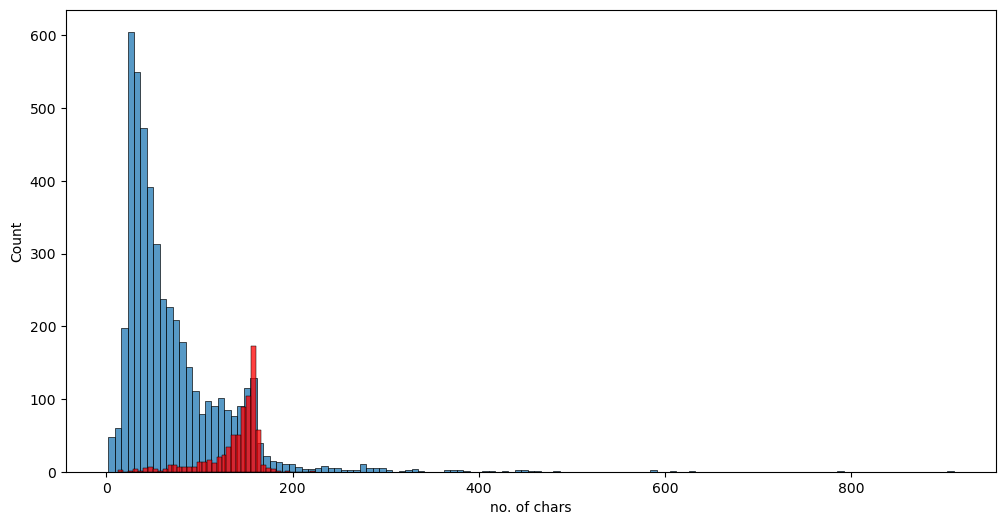

In [25]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['spam']==0]['no. of chars'])
sns.histplot(data[data['spam']==1]['no. of chars'],color='red')

<Axes: xlabel='no. of words', ylabel='Count'>

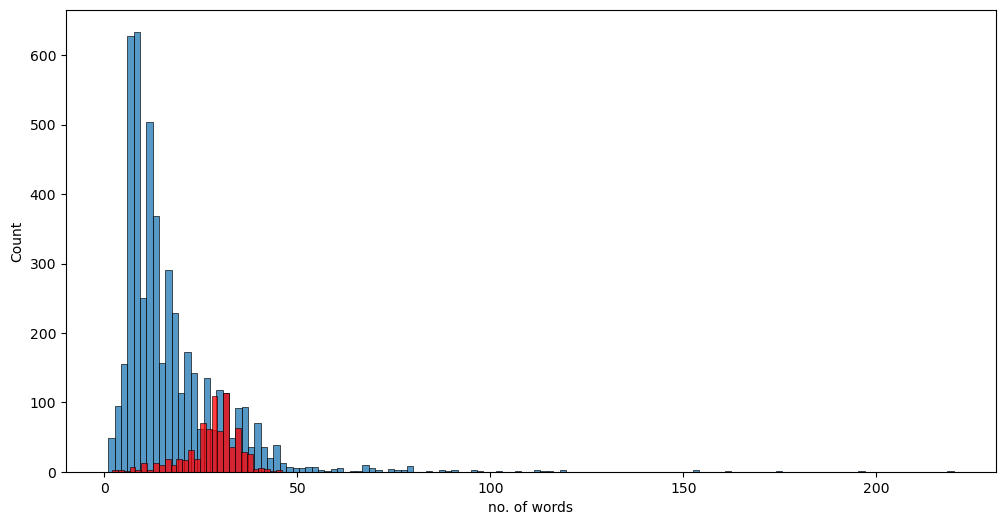

In [26]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['spam']==0]['no. of words'])
sns.histplot(data[data['spam']==1]['no. of words'],color='red')

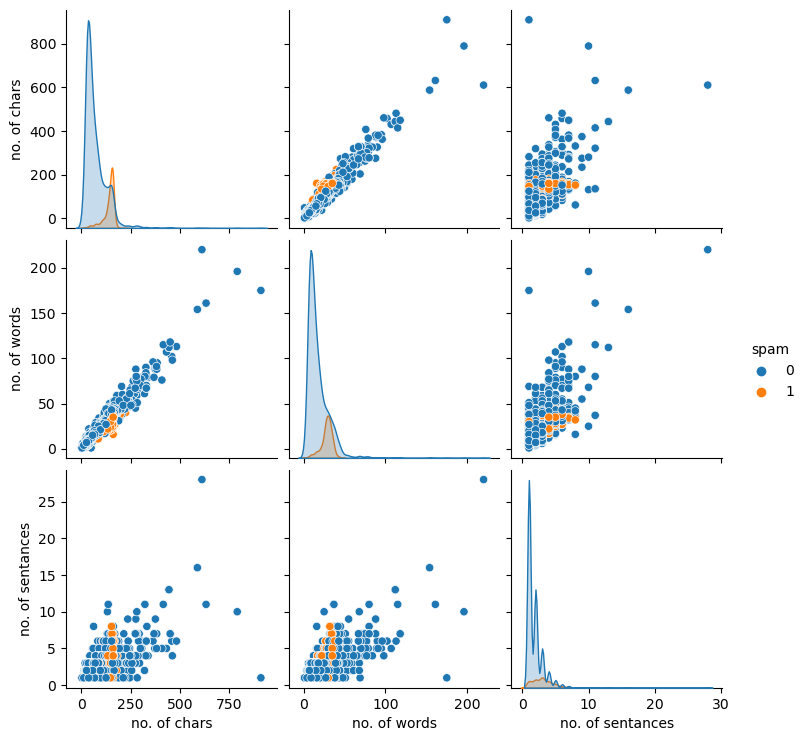

In [27]:
sns.pairplot(data,hue='spam',)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13412\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

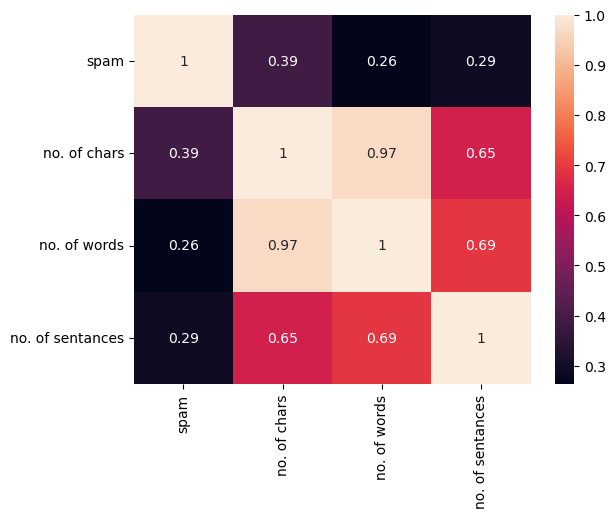

In [28]:
sns.heatmap(data.corr(),annot=True)

### Data Preprocessing

1. Lower Case
2. Tokenization
3. Remove Stop words and punctuation
4. Remove special characters
5. Stemming

In [29]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [i for  i in text if i.isalnum()]
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation] 
    text = [ps.stem(i) for i in text]
    return " ".join(text)
    

In [31]:
data['transform_text'] = data['text'].apply(transform_text)

data['transform_text'][:5]

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transform_text, dtype: object

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
from wordcloud import WordCloud

spam_wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')
spam_wc.generate(data[data['spam']==1]['transform_text'].str.cat(sep = ''))


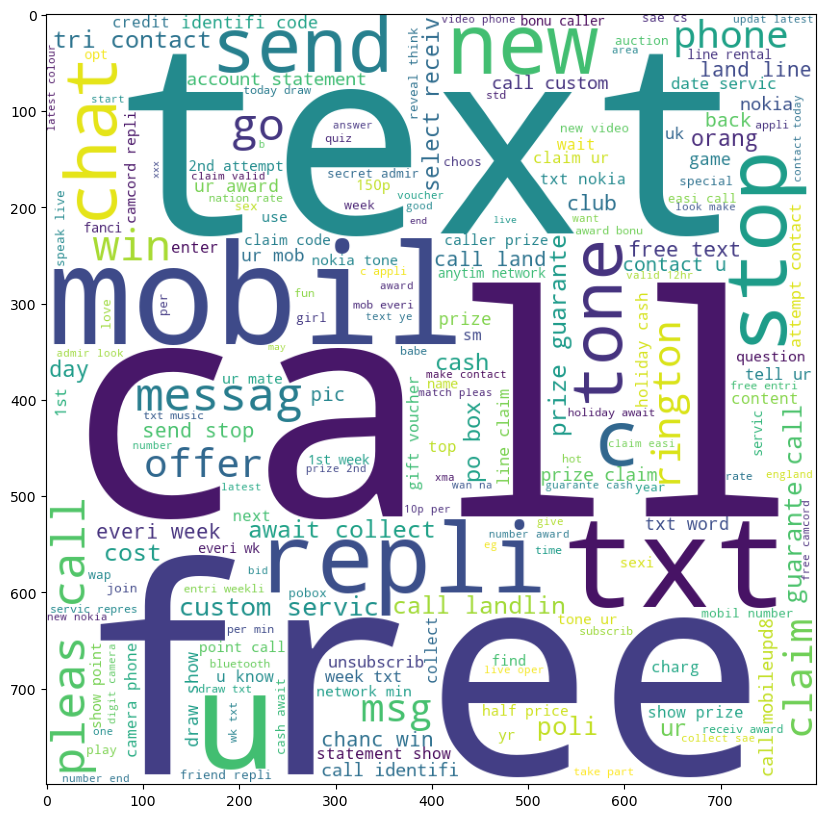

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [36]:
ham_wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')
ham_wc.generate(data[data['spam']==0]['transform_text'].str.cat(sep = ''))

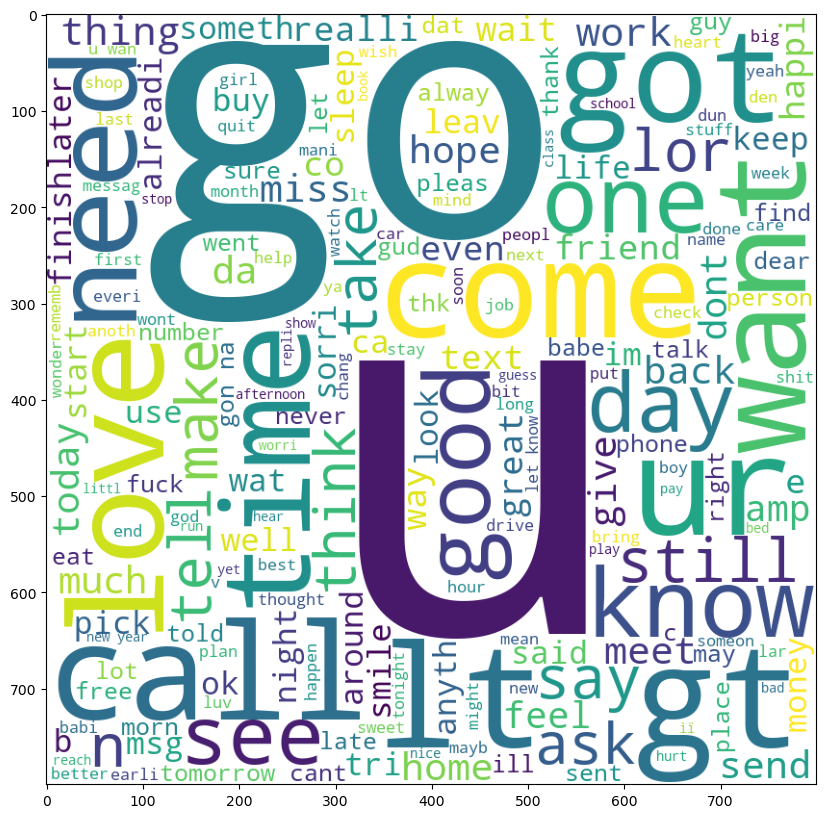

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [38]:
data.head()

,spam,text,no. of chars,no. of words,no. of sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
corpus = []

for msg in data[data['spam']==1]['transform_text'].tolist():
    for wor in msg.split():
        corpus.append(wor)
corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

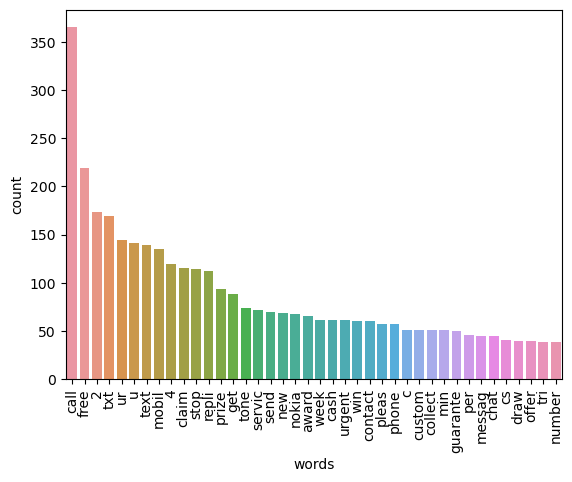

In [40]:
from collections import Counter

dict_count = Counter(corpus).most_common(40)
df_count = pd.DataFrame((dict_count))
df_count

# plot a graph

sns.barplot(x = df_count[0],y = df_count[1],)
plt.xlabel('words')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

- Vectorize the data - Bag Of Words - Convert to frequent words 
                     - Word@Vec 
                     - TFIDF

#####  Bag Of Words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data['transform_text']).toarray()
X.shape


(5572, 6708)

##### TFIDF

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transform_text']).toarray()
X.shape


(5572, 3000)

In [94]:
y = data['spam']
y.shape

(5572,)

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

##### Fit all models

In [97]:
gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

##### Predictions

In [98]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

##### Performance of model

In [99]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

print('Performance of GaussianNB')
print('Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
print('Precision Score: ',precision_score(y_test,y_pred_gnb))
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred_gnb))

print('\n')

print('Performance of MultinomialNB')
print('Accuracy Score: ',accuracy_score(y_test,y_pred_mnb))
print('Precision Score: ',precision_score(y_test,y_pred_mnb))
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred_mnb))

print('\n')

print('Performance of BernoulliNB')
print('Accuracy Score: ',accuracy_score(y_test,y_pred_bnb))
print('Precision Score: ',precision_score(y_test,y_pred_bnb))
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred_bnb))

Performance of GaussianNB
Accuracy Score:  0.8538116591928251
Precision Score:  0.47653429602888087
Confusion Matrix:  [[820 145]
 [ 18 132]]


Performance of MultinomialNB
Accuracy Score:  0.9775784753363229
Precision Score:  1.0
Confusion Matrix:  [[965   0]
 [ 25 125]]


Performance of BernoulliNB
Accuracy Score:  0.9748878923766816
Precision Score:  0.9621212121212122
Confusion Matrix:  [[960   5]
 [ 23 127]]


#### Trying other Classification Algorithms

In [100]:
pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [102]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [103]:
clfs = {
    'SVC' : svc,
    'KNN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [104]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [105]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748878923766816, 0.9621212121212122)

In [106]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748878923766816
Precision -  0.9621212121212122
For  KNN
Accuracy -  0.9201793721973094
Precision -  1.0
For  NB
Accuracy -  0.9775784753363229
Precision -  1.0
For  DT
Accuracy -  0.9399103139013453
Precision -  0.8878504672897196
For  LR
Accuracy -  0.9461883408071748
Precision -  0.9166666666666666
For  RF
Accuracy -  0.9757847533632287
Precision -  1.0
For  AdaBoost
Accuracy -  0.9668161434977578
Precision -  0.9747899159663865
For  BgC
Accuracy -  0.9695067264573991
Precision -  0.9142857142857143
For  GBDT
Accuracy -  0.95695067264574
Precision -  0.9903846153846154
For  xgb
Accuracy -  0.9739910313901345
Precision -  0.984


In [111]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [112]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.920179,1.000000
2,NB,0.977578,1.000000
5,RF,0.975785,1.000000
8,GBDT,0.956951,0.990385
9,xgb,0.973991,0.984000
6,AdaBoost,0.966816,0.974790
0,SVC,0.974888,0.962121
4,LR,0.946188,0.916667
7,BgC,0.969507,0.914286
3,DT,0.939910,0.887850


#### Visualize the performance of algorithms

<Axes: xlabel='Algorithm'>

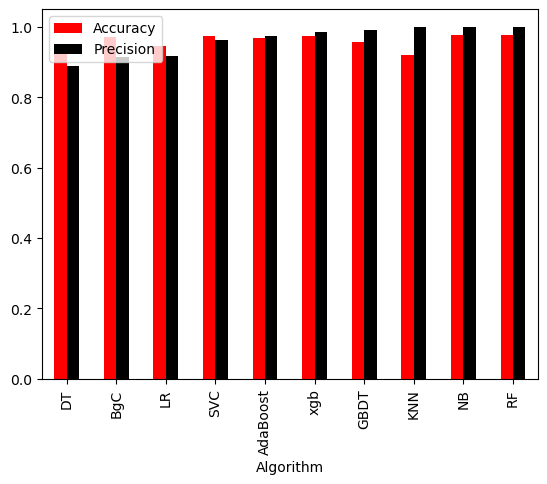

In [110]:
performance_df.plot(x='Algorithm',y=['Accuracy','Precision'],kind='bar',color=['red','black'])

In [114]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))